In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
titanic_gender = pd.read_csv('gender_submission.csv')
titanic_test = pd.read_csv('test.csv')
titanic_train = pd.read_csv('train.csv')

In [5]:
titanic_gender.isnull().values.any()

False

In [10]:
titanic_test.isnull().values.sum().sum()

414

In [7]:
titanic_train.isnull().values.any()

True

In [57]:
titanic_data = titanic_test[['PassengerId', 'Pclass', 'Sex', 'Age']]
titanic_survival = titanic_gender[['PassengerId', 'Survived']]
gender = {'male':0, 'female':1}
titanic_data.Sex = [gender[item] for item in titanic_data.Sex]
print(titanic_data)

     PassengerId  Pclass  Sex   Age
0            892       3    0  34.5
1            893       3    1  47.0
2            894       2    0  62.0
3            895       3    0  27.0
4            896       3    1  22.0
5            897       3    0  14.0
6            898       3    1  30.0
7            899       2    0  26.0
8            900       3    1  18.0
9            901       3    0  21.0
10           902       3    0   NaN
11           903       1    0  46.0
12           904       1    1  23.0
13           905       2    0  63.0
14           906       1    1  47.0
15           907       2    1  24.0
16           908       2    0  35.0
17           909       3    0  21.0
18           910       3    1  27.0
19           911       3    1  45.0
20           912       1    0  55.0
21           913       3    0   9.0
22           914       1    1   NaN
23           915       1    0  21.0
24           916       1    1  48.0
25           917       3    0  50.0
26           918       1    

In [58]:
age_range = np.array(titanic_data['Age'])
print(age_range)

[34.5  47.   62.   27.   22.   14.   30.   26.   18.   21.     nan 46.
 23.   63.   47.   24.   35.   21.   27.   45.   55.    9.     nan 21.
 48.   50.   22.   22.5  41.     nan 50.   24.   33.     nan 30.   18.5
   nan 21.   25.     nan 39.     nan 41.   30.   45.   25.   45.     nan
 60.   36.   24.   27.   20.   28.     nan 10.   35.   25.     nan 36.
 17.   32.   18.   22.   13.     nan 18.   47.   31.   60.   24.   21.
 29.   28.5  35.   32.5    nan 55.   30.   24.    6.   67.   49.     nan
   nan   nan 27.   18.     nan  2.   22.     nan 27.     nan 25.   25.
 76.   29.   20.   33.   43.   27.     nan 26.   16.   28.   21.     nan
   nan 18.5  41.     nan 36.   18.5  63.   18.     nan  1.   36.   29.
 12.     nan 35.   28.     nan 17.   22.     nan 42.   24.   32.   53.
   nan   nan 43.   24.   26.5  26.   23.   40.   10.   33.   61.   28.
 42.   31.     nan 22.     nan 30.   23.     nan 60.5  36.   13.   24.
 29.   23.   42.   26.     nan  7.   26.     nan 41.   26.   48.   18.

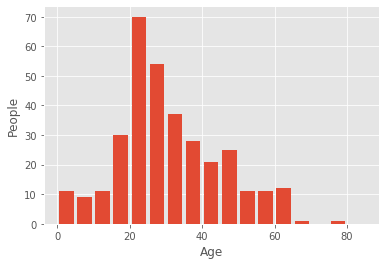

In [59]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85]
plt.hist(age_range, bins, histtype='bar', rwidth=.8)
plt.xlabel('Age')
plt.ylabel('People')
plt.show()

In [60]:
print(np.nanmean(age_range)) ; print(np.nanmedian(age_range))

30.272590361445783
27.0


In [61]:
titanic_no_nan= titanic_data.fillna(titanic_data.median())
titanic_no_nan.isna().any()


PassengerId    False
Pclass         False
Sex            False
Age            False
dtype: bool

In [62]:
titanic_survival.isna().any()

PassengerId    False
Survived       False
dtype: bool

In [63]:
X1 = np.array(titanic_no_nan)
y1 = np.array(titanic_survival)
print(X1) ; print(y1)

[[8.920e+02 3.000e+00 0.000e+00 3.450e+01]
 [8.930e+02 3.000e+00 1.000e+00 4.700e+01]
 [8.940e+02 2.000e+00 0.000e+00 6.200e+01]
 ...
 [1.307e+03 3.000e+00 0.000e+00 3.850e+01]
 [1.308e+03 3.000e+00 0.000e+00 2.700e+01]
 [1.309e+03 3.000e+00 0.000e+00 2.700e+01]]
[[ 892    0]
 [ 893    1]
 [ 894    0]
 [ 895    0]
 [ 896    1]
 [ 897    0]
 [ 898    1]
 [ 899    0]
 [ 900    1]
 [ 901    0]
 [ 902    0]
 [ 903    0]
 [ 904    1]
 [ 905    0]
 [ 906    1]
 [ 907    1]
 [ 908    0]
 [ 909    0]
 [ 910    1]
 [ 911    1]
 [ 912    0]
 [ 913    0]
 [ 914    1]
 [ 915    0]
 [ 916    1]
 [ 917    0]
 [ 918    1]
 [ 919    0]
 [ 920    0]
 [ 921    0]
 [ 922    0]
 [ 923    0]
 [ 924    1]
 [ 925    1]
 [ 926    0]
 [ 927    0]
 [ 928    1]
 [ 929    1]
 [ 930    0]
 [ 931    0]
 [ 932    0]
 [ 933    0]
 [ 934    0]
 [ 935    1]
 [ 936    1]
 [ 937    0]
 [ 938    0]
 [ 939    0]
 [ 940    1]
 [ 941    1]
 [ 942    0]
 [ 943    0]
 [ 944    1]
 [ 945    1]
 [ 946    0]
 [ 947    0]
 [ 948  

In [65]:
print(len(X1)) ; print(len(y1))

418
418


In [64]:
xtrain, xtest, ytrain, ytest = train_test_split(X1, y1, random_state=3)
model = svm.SVC(kernel='linear')
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

ValueError: bad input shape (313, 2)

In [ ]:
model 